<div class="alert alert-block alert-info">

## Tasca M10 T01 Web scraping i automatització.
### Objectius

- Web scraping.
- Documentar dades recollides amb web scraping.
    
    
- **Exercici 1**

    - Realitza web scraping de dues de les tres pàgines web proposades utilitzant BeautifulSoup primer i Selenium després. 

    - http://quotes.toscrape.com

    - https://www.bolsamadrid.es

    - www.wikipedia.es (fes alguna cerca primer i escrapeja algun contingut)

- **Exercici 2**

    - Documenta en un Word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.

    - A manera d'exemple del que es demana pots consultar aquest enllaç:

        ->https://www.kaggle.com/datasets/vivovinco/20212022-football-team-stats.

- **Exercici 3**

    - Tria una pàgina web que tu vulguis i realitza web scraping mitjançant la llibreria Selenium primer i Scrapy després.
</div>

In [6]:
# importing the necessary modules:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [22]:

import requests
from bs4 import BeautifulSoup


In [33]:
## Aqui primer hem installat el necessrai per fer web scraping
# selenium 4
from selenium import webdriver
from selenium.webdriver.firefox.service import Service as FirefoxService
# from webdriver_manager.firefox import GeckoDriverManager

# driver = webdriver.Firefox(service=FirefoxService(GeckoDriverManager().install()))

[WDM] - Downloading: 16.9kB [00:00, ?B/s]                                                                              



<div class="alert alert-block alert-info">
    
## Exercici 1
      
 - Realitza web scraping de dues de les tres pàgines web proposades utilitzant BeautifulSoup primer i Selenium després. 

    - http://quotes.toscrape.com

    - https://www.bolsamadrid.es

    - www.wikipedia.es (fes alguna cerca primer i escrapeja algun contingut)

</div>

<div class="alert alert-warning alert-warning"> 

- Utilitzaré les pagines de wikipedia i de quotes per fer la busqueda amb les dues llibreries.
 
- primer ho faré amb la llibreria beautiful soup i després amb Selenium
  

</div>

In [23]:
## instead of parsing text we want to parse content to work with it
#URL = "http://quotes.toscrape.com/"
URL ="https://es.wikipedia.org/wiki/Web_scraping"
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")



<div class="alert alert-warning alert-warning"> 

- Amb Beautifull soup podem trobar elements HTML
    

  
</div>

In [24]:
## Look for the place n
results = soup.find(id="content")
print(results.prettify())


<div class="mw-body" id="content" role="main">
 <a id="top">
 </a>
 <div id="siteNotice">
  <!-- CentralNotice -->
 </div>
 <div class="mw-indicators">
 </div>
 <h1 class="firstHeading mw-first-heading" id="firstHeading">
  <span class="mw-page-title-main">
   Web scraping
  </span>
 </h1>
 <div class="vector-body" id="bodyContent">
  <div class="noprint" id="siteSub">
   De Wikipedia, la enciclopedia libre
  </div>
  <div id="contentSub">
   <div id="mw-content-subtitle">
   </div>
  </div>
  <div id="contentSub2">
  </div>
  <div id="jump-to-nav">
  </div>
  <a class="mw-jump-link" href="#mw-head">
   Ir a la navegación
  </a>
  <a class="mw-jump-link" href="#searchInput">
   Ir a la búsqueda
  </a>
  <div class="mw-body-content mw-content-ltr" dir="ltr" id="mw-content-text" lang="es">
   <div class="mw-parser-output">
    <p>
     <i>
      <b>
       Web scraping
      </b>
     </i>
     o raspado web, es una técnica utilizada mediante
     <a href="/wiki/Programa_inform%C3%A1tico

In [25]:
## look for list of references
listaReferencias = results.find_all("div", class_="listaref")



In [36]:
for ref in listaReferencias:
    print(ref, end="\n"*2)


<div class="listaref" style="-moz-column-count:2; -webkit-column-count:2; column-count:2; list-style-type: decimal;"><ol class="references">
<li id="cite_note-(1)_Martí,_Sitelabs,_2016-1"><span class="mw-cite-backlink"><a href="#cite_ref-(1)_Martí,_Sitelabs,_2016_1-0">↑</a></span> <span class="reference-text"> <span class="citation web" id="CITAREFMartí8_de_abril_de_2016">Martí, Marq (8 de abril de 2016). <a class="external text" href="https://web.archive.org/web/20170729001446/https://sitelabs.es/web-scraping-introduccion-y-herramientas/" rel="nofollow">«¿Qué es el Web scraping? Introducción y herramientas»</a> <span style="color:#555;">(html)</span>. <i>Sitelab España</i>. Archivado desde <a class="external text" href="https://sitelabs.es/web-scraping-introduccion-y-herramientas/" rel="nofollow">el original</a> el 29 de julio de 2017<span class="reference-accessdate">. Consultado el 30 de marzo de 2020</span>. «El web scraping es una técnica que sirve para extraer información de pági

In [26]:
for ref in listaReferencias:
    ref_title = ref.find("a", class_="external text")
    ref_date = ref.find("span", class_="reference-accessdate")
    ref_link = ref.find("a", class_="external free")
    print(ref_title.text.strip())
    print(ref_date.text.strip())
    print(ref_link.text.strip())


«¿Qué es el Web scraping? Introducción y herramientas»
. Consultado el 30 de marzo de 2020
http://www.gooseeker.com/en/node/knowledgebase/freeformat


In [60]:
for link in listaReferencias:
    ref_link = ref.find("a", class_="external free")
    print(ref_link)
    print(ref_link.text.strip())

<a class="external free" href="http://www.gooseeker.com/en/node/knowledgebase/freeformat" rel="nofollow">http://www.gooseeker.com/en/node/knowledgebase/freeformat</a>
http://www.gooseeker.com/en/node/knowledgebase/freeformat



<div class="alert alert-warning alert-warning"> 

- Busquem el titol de l'article i la primera part de la definió
    
    - Titol de la busqueda 

    - Sumari de la definició
  

</div>

In [27]:
## Look for the title
soup = BeautifulSoup(page.content, "html.parser")
results = soup.find(id='firstHeading')
print(results.prettify())


<h1 class="firstHeading mw-first-heading" id="firstHeading">
 <span class="mw-page-title-main">
  Web scraping
 </span>
</h1>



In [28]:
## Get just the text we are interested in
nameSearch = results.find("span", class_="mw-page-title-main")
nameSearch.text.strip()

'Web scraping'


<div class="alert alert-warning alert-warning"> 

- Ara busco la definició:
  

</div>

In [83]:
## We look for the id where the first definition is
results2 = soup.find(id='mw-content-text')
print(results2.prettify())

<div class="mw-body-content mw-content-ltr" dir="ltr" id="mw-content-text" lang="es">
 <div class="mw-parser-output">
  <p>
   <i>
    <b>
     Web scraping
    </b>
   </i>
   o raspado web, es una técnica utilizada mediante
   <a href="/wiki/Programa_inform%C3%A1tico" title="Programa informático">
    programas de software
   </a>
   para extraer información de
   <a href="/wiki/Sitio_web" title="Sitio web">
    sitios web
   </a>
   .
   <sup class="reference separada" id="cite_ref-(1)_Martí,_Sitelabs,_2016_1-0">
    <a href="#cite_note-(1)_Martí,_Sitelabs,_2016-1">
     <span class="corchete-llamada">
      [
     </span>
     1
     <span class="corchete-llamada">
      ]
     </span>
    </a>
   </sup>
   ​ Usualmente, estos programas simulan la navegación de un humano en la
   <a href="/wiki/World_Wide_Web" title="World Wide Web">
    World Wide Web
   </a>
   ya sea utilizando el
   <a class="mw-redirect" href="/wiki/Hypertext_Transfer_Protocol" title="Hypertext Transfer Protoc

In [91]:
## We scrap the firat definition of the term
abstract = results2.find('div', class_='mw-parser-output').find('p')
abstract.text.strip()


'Web scraping o raspado web, es una técnica utilizada mediante programas de software para extraer información de sitios web.[1]\u200b Usualmente, estos programas simulan la navegación de un humano en la World Wide Web ya sea utilizando el protocolo HTTP manualmente, o incrustando un navegador en una aplicación.'


<div class="alert alert-warning alert-warning"> 

- Ara busquem a la segona pagina, la pagina de quotes
  

</div>

In [29]:
# We do a request of the url we want
URL = "http://quotes.toscrape.com/"
page = requests.get(URL)

print(page.text)

<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="UTF-8">
	<title>Quotes to Scrape</title>
    <link rel="stylesheet" href="/static/bootstrap.min.css">
    <link rel="stylesheet" href="/static/main.css">
</head>
<body>
    <div class="container">
        <div class="row header-box">
            <div class="col-md-8">
                <h1>
                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>
                </h1>
            </div>
            <div class="col-md-4">
                <p>
                
                    <a href="/login">Login</a>
                
                </p>
            </div>
        </div>
    

<div class="row">
    <div class="col-md-8">

    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">
        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
        <span>by <small class="author" itempr

In [30]:
## Look into the container, where the quouts are
soup = BeautifulSoup(page.content, "html.parser")

results = soup.find(class_='container')
print(results.prettify())

<div class="container">
 <div class="row header-box">
  <div class="col-md-8">
   <h1>
    <a href="/" style="text-decoration: none">
     Quotes to Scrape
    </a>
   </h1>
  </div>
  <div class="col-md-4">
   <p>
    <a href="/login">
     Login
    </a>
   </p>
  </div>
 </div>
 <div class="row">
  <div class="col-md-8">
   <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
    <span class="text" itemprop="text">
     “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
    </span>
    <span>
     by
     <small class="author" itemprop="author">
      Albert Einstein
     </small>
     <a href="/author/Albert-Einstein">
      (about)
     </a>
    </span>
    <div class="tags">
     Tags:
     <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
     <a class="tag" href="/tag/change/page/1/">
      change
     </a>
     <a class="tag" href="/tag/deep-thoughts/

In [35]:
## We first identifie where the quotes are
quotes = results.find_all('div', class_='quote')
quotes

[<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
 <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
 <span>by <small class="author" itemprop="author">Albert Einstein</small>
 <a href="/author/Albert-Einstein">(about)</a>
 </span>
 <div class="tags">
             Tags:
             <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
 <a class="tag" href="/tag/change/page/1/">change</a>
 <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
 <a class="tag" href="/tag/thinking/page/1/">thinking</a>
 <a class="tag" href="/tag/world/page/1/">world</a>
 </div>
 </div>,
 <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
 <span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
 <span>by <small class="author" itempr

In [36]:
## Display everything in quotes
for quote in quotes:
    print(quote, end="\n"*2)  # vemos nuestras citas

<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>
</div>

<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
<span>by <small class="author" itemprop="author">J.K. 

In [37]:
## Creat a list for tags
keytags = []

# With find(9 we look inside the text and find the parts we want)
for quote in quotes:
    text = quote.find("span", class_="text")
    author = quote.find("small", class_="author")
    tags = quote.find("meta", class_="keywords")
       
    print(text.text.strip())
    print(author.text.strip())
    print(tags['content'])

    



“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Albert Einstein
change,deep-thoughts,thinking,world
“It is our choices, Harry, that show what we truly are, far more than our abilities.”
J.K. Rowling
abilities,choices
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Albert Einstein
inspirational,life,live,miracle,miracles
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Jane Austen
aliteracy,books,classic,humor
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Marilyn Monroe
be-yourself,inspirational
“Try not to become a man of success. Rather become a man of value.”
Albert Einstein
adulthood,success,value
“It is better to be hated for what you are than to be loved for what you are not.”
André Gide
life,love
“I have not fa

In [38]:
## Here we display the quotes
for quote in quotes:
    tags = quote.find("meta", class_="keywords")
    print(tags['content'])
    
    

change,deep-thoughts,thinking,world
abilities,choices
inspirational,life,live,miracle,miracles
aliteracy,books,classic,humor
be-yourself,inspirational
adulthood,success,value
life,love
edison,failure,inspirational,paraphrased
misattributed-eleanor-roosevelt
humor,obvious,simile



<div class="alert alert-warning alert-warning"> 

## SELENIUM

- Ara agafem les mateixes pagines i ho fem amb la llibreria Selenium
  

</div>

In [39]:
import unittest
from selenium import webdriver

from selenium.webdriver import Firefox
from selenium.webdriver.firefox.options import Options as FirefoxOptions
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.support.select import Select
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

from selenium import webdriver

from selenium import webdriver
from selenium.webdriver.common.by import By

In [40]:

## Create a webdriver object and navigate to the Wikipedia page
opts = Options()
opts.add_argument("--headless")
# we oppen navigator in firefox needs to ble closed later!
browser = Firefox(options=opts) 
# get the url we want
browser.get(url = 'https://quotes.toscrape.com/') 
# We read the same as before in this webpage
results = browser.find_element(By.CLASS_NAME, 'container')  

## display the results text
results.text


"Quotes to Scrape\nLogin\n“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”\nby Albert Einstein (about)\nTags: change deep-thoughts thinking world\n“It is our choices, Harry, that show what we truly are, far more than our abilities.”\nby J.K. Rowling (about)\nTags: abilities choices\n“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”\nby Albert Einstein (about)\nTags: inspirational life live miracle miracles\n“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”\nby Jane Austen (about)\nTags: aliteracy books classic humor\n“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”\nby Marilyn Monroe (about)\nTags: be-yourself inspirational\n“Try not to become a man of success. Rather become a man of value.”\nby Albert Einstein (about)\nTag

In [42]:
## locating by class name
quote = browser.find_element(By.CLASS_NAME, 'quote')
quote.text

'“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”\nby Albert Einstein (about)\nTags: change deep-thoughts thinking world'


<div class="alert alert-warning alert-warning"> 

- He buscat per class name, pero em surt tota la quota autor i tags al maeix element

- Probo buscant per path
  

</div>

In [43]:
# We locate the elements we want by path
element = browser.find_element(by=By.XPATH, value="/html/body/div/div[2]/div[1]/div[1]")  
# quoteText = element.text
print(element.text)


“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
by Albert Einstein (about)
Tags: change deep-thoughts thinking world


In [44]:
## We look for the quote by class name
quote_elements = browser.find_elements(By.CLASS_NAME, "quote")

# loop through each quote element and extract the quote text, author and tags
for quote in quote_elements:
    quote_text = quote.find_element(By.CLASS_NAME, "text").text
    author = quote.find_element(By.CLASS_NAME, "author").text
    tags = [tag.text for tag in quote.find_elements(By.CLASS_NAME, "tag")]

    # print the quote text, author and tags
    print(f'"{quote_text}"\n- {author}\nTags: {", ".join(tags)}\n')

"“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”"
- Albert Einstein
Tags: change, deep-thoughts, thinking, world

"“It is our choices, Harry, that show what we truly are, far more than our abilities.”"
- J.K. Rowling
Tags: abilities, choices

"“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”"
- Albert Einstein
Tags: inspirational, life, live, miracle, miracles

"“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”"
- Jane Austen
Tags: aliteracy, books, classic, humor

"“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”"
- Marilyn Monroe
Tags: be-yourself, inspirational

"“Try not to become a man of success. Rather become a man of value.”"
- Albert Einstein
Tags: adulthood, success, value

"“It is better to be hated for what yo


<div class="alert alert-warning alert-warning"> 

- Ara que ja tenim totes les quotes, autors i labels, els coloquem en un datafram per poder treballar amb ells


</div>

In [45]:
# create an empty list to store the quotes
quotes = []

# iterate over each quote element and extract the text, author, and tags
for quote in browser.find_elements(By.CLASS_NAME, "quote"):
    text = quote.find_element(By.CLASS_NAME, "text").text
    author = quote.find_element(By.CLASS_NAME, "author").text
    tags = ", ".join(tag.text for tag in quote.find_elements(By.CLASS_NAME, "tag"))
    quotes.append({"quote": text, "author": author, "labels": tags})

# create a dataframe from the quotes list
df = pd.DataFrame(quotes)
df

,quote,author,labels
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational"
5,“Try not to become a man of success. Rather be...,Albert Einstein,"adulthood, success, value"
6,“It is better to be hated for what you are tha...,André Gide,"life, love"
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison,"edison, failure, inspirational, paraphrased"
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt,misattributed-eleanor-roosevelt
9,"“A day without sunshine is like, you know, nig...",Steve Martin,"humor, obvious, simile"


In [46]:
## Close browser
browser.close()



<div class="alert alert-warning alert-warning"> 

- Ara faig el mateix per la pagina de wikipedia amb la llibreria Selenum
  

</div>

In [47]:
# set up the webdriver
opts = Options()
opts.add_argument("--headless")
# we oppen navigator in firefox needs to ble closed later!
browser = Firefox(options=opts) 
# get the url we want
browser.get(url = 'https://es.wikipedia.org/wiki/Web_scraping') 



In [48]:
# Find the elements by their name attribute and extract the text
name_element = browser.find_element(By.TAG_NAME, 'b')
name = name_element.text

# Find the elements by their name attribute and extract the text
first_para_element = browser.find_element(By.TAG_NAME, 'p')
first_para = first_para_element.text.split('\n')[0]

# Print the output
print("Name: ", name)
print("First Paragraph: ", first_para)

Name:  Web scraping
First Paragraph:  Web scraping o raspado web, es una técnica utilizada mediante programas de software para extraer información de sitios web.1 Usualmente, estos programas simulan la navegación de un humano en la World Wide Web ya sea utilizando el protocolo HTTP manualmente, o incrustando un navegador en una aplicación.


In [49]:
## Close browser
browser.close()



<div class="alert alert-block alert-info">
    
## Exercici 2
      
- Documenta en un Word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.

- A manera d'exemple del que es demana pots consultar aquest enllaç:

    ->https://www.kaggle.com/datasets/vivovinco/20212022-football-team-stats.

</div>

<div class="alert alert-warning alert-warning"> 

- En aquest cas utilitzaré el dataframe creat amb la llibreria Selenium de quotes
    
- Aquí mostraré els diferent processos per obtenir la informació que posaré en en una cella de Markdown al final
  
</div>

In [9]:
df

,quote,author,labels
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational"
5,“Try not to become a man of success. Rather be...,Albert Einstein,"adulthood, success, value"
6,“It is better to be hated for what you are tha...,André Gide,"life, love"
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison,"edison, failure, inspirational, paraphrased"
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt,misattributed-eleanor-roosevelt
9,"“A day without sunshine is like, you know, nig...",Steve Martin,"humor, obvious, simile"


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quote   10 non-null     object
 1   author  10 non-null     object
 2   labels  10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


In [13]:
df.author.nunique()

8

In [14]:
df.author.unique()

array(['Albert Einstein', 'J.K. Rowling', 'Jane Austen', 'Marilyn Monroe',
       'André Gide', 'Thomas A. Edison', 'Eleanor Roosevelt',
       'Steve Martin'], dtype=object)

<div class="alert alert-warning alert-warning"> 

## Sobre la base de dades:
    
### Context   
    
- La base de dades conté quotes de diferents autors, que estan classificades segons diferentes etiquetes
    
### Contingut

- La base de dades conté 10 entrades amb 3 columnes
    
- La descripció de cada columna és la següent:
    
    - **quote**: text amb la cita de l'autor
    - **author**: autor que ha fet la cita
    - **labels**: diferent etiquetes amb les que es qualifica la cita
    
### Agraïments:
    
- Agraeixo a googlei sobretot a chatGPT per la sev immensa ajuda en trobar el codi per extreure aquesta informació
  
</div>

In [17]:
df

,quote,author,labels
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational"
5,“Try not to become a man of success. Rather be...,Albert Einstein,"adulthood, success, value"
6,“It is better to be hated for what you are tha...,André Gide,"life, love"
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison,"edison, failure, inspirational, paraphrased"
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt,misattributed-eleanor-roosevelt
9,"“A day without sunshine is like, you know, nig...",Steve Martin,"humor, obvious, simile"


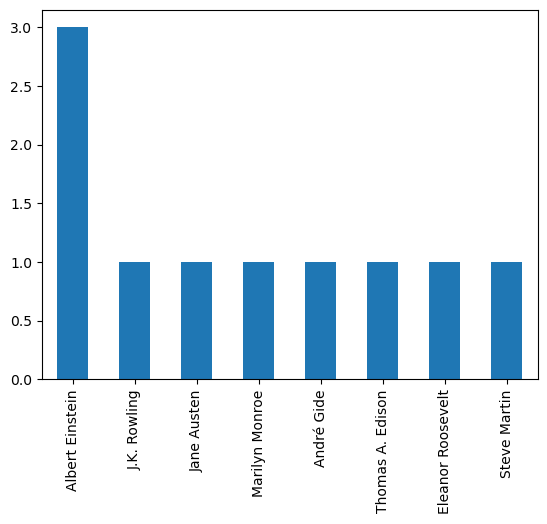

In [18]:
# count the number of occurrences of each label
df['author'].value_counts().plot(kind ='bar')

# plot the counts as a bar chart

plt.show()

In [19]:
df.to_csv('quote.csv', index=False)